# EC Analysis Report Template
0. You need to install all the required package from `requirements.txt` first:
```
pip install -r /path/to/requirements.txt
```
> here we'll use: 
    - pandas==0.22
    - matplotlib
    - tqdm 
    - dask[dataframe]==2.3.0
    - gcsfs==0.3.0
    - gcloud 
    - scikit-learn
    - gensim
    - jieba
    - wordcloud


In [1]:
import os
import numpy as np
import pandas as pd
import dask.dataframe as dd
import datetime, time, csv
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from tqdm import tqdm
from google.cloud import storage
import warnings
warnings.filterwarnings("ignore")
import EC_AllReportFunctions as ec
import IndustryID_to_EC as ind_ec
import upload_GoogleStorage as upload_gs


In [2]:
# report style 設定
plt.style.use('ggplot')
fontproperties = FontProperties(fname='font_ch.ttf', size=14)
font = 'font_ch.ttf'


In [7]:
# 參數設定
dataUrl_TrackTrans_in_allInd = 'gs://tagtoo-bigquery-export/ECAnalysis/1253_trackTrans_inAllInd_201906_201912/*'
dataUrl_ind_trackTrans = 'gs://tagtoo-bigquery-export/ECAnalysis/ind_womenShoe_trackTrans_201911/*'
dataUrl_tagtoodb_201912_ec_avg_visit = 'gs://tagtoo-bigquery-export/tagtoodb_monthly_ec_avg_visit'
dataUrl_tagtoodb_201912_ind_avg_visit = 'gs://tagtoo-bigquery-export/tagtoodb_monthly_ind_avg_visit'
dataUrl_tagtoodb_201912_ec_avg_purchase = 'gs://tagtoo-bigquery-export/tagtoodb_monthly_ec_avg_purchase'
dataUrl_tagtoodb_201912_ind_avg_purchase = 'gs://tagtoo-bigquery-export/tagtoodb_monthly_ind_avg_purchase'
dataUrl_external_weighted = 'gs://tagtoo-bigquery-export/ECAnalysis/src/industry_weight.csv'


cli_id = 1253
ind_cli_id = 256
client_name = 'Dr.QQ'
ind_client_name = 'fmshoes'
default_start_date = '201906'
default_end_date = '201912'
specific_month = 12
industry_dict = ind_ec.industry_dict()
bw_date = '20191201_20191231' #商周的文章期間


In [9]:
# 讀取檔案
df = ec.queryFromBQ(dataUrl_TrackTrans_in_allInd)
df_inter = df[df['advertiser_id'] == int(cli_id)]
print(len(df_inter))
df_inter.head()

df_outer = df[(df['advertiser_id'] != int(cli_id)) & (df['view_bymonth'] == int(specific_month))]
print(len(df_outer))
df_outer.head()

df_ind = ec.queryFromBQ(dataUrl_ind_trackTrans)
df_external_weighted = ec.queryFromBQ(dataUrl_external_weighted)

# 2020.01.17 updated: 以外部資料做產業加權
df_tagtoodb_201912_ec_avg_visit = ec.countPercentage(ec.queryFromBQ(dataUrl_tagtoodb_201912_ec_avg_visit))
df_tagtoodb_201912_ind_avg_visit = ec.externalweightedPercentage(ec.countPercentage(ec.queryFromBQ(dataUrl_tagtoodb_201912_ind_avg_visit)), df_external_weighted)
df_tagtoodb_201912_ec_avg_purchase = ec.countPercentage(ec.queryFromBQ(dataUrl_tagtoodb_201912_ec_avg_purchase))
df_tagtoodb_201912_ind_avg_purchase = ec.externalweightedPercentage(ec.countPercentage(ec.queryFromBQ(dataUrl_tagtoodb_201912_ind_avg_purchase)), df_external_weighted)

df_tagtoodb_201912_ind_avg_visit
df_tagtoodb_201912_ec_avg_purchase


Amount of data:  24
Loading Time = 0.2718231678009033
Amount of data:  399
Loading Time = 0.10239386558532715
Amount of data:  24
Loading Time = 0.10334420204162598
Amount of data:  200
Loading Time = 0.2158832550048828
Amount of data:  21
Loading Time = 0.15999388694763184


count_user  industry_id  origin_percent     Weight    percent
0     25357401            9       18.981859  21.457064  88.619045
1     72648992           23       54.383053   0.563853   6.671866
2       316410           20        0.236856   1.000000   0.051535
3      3347835           13        2.506098   1.000000   0.545276
4     17034202            4       12.751339   0.215498   0.597885
5      3359814            8        2.515065   1.087997   0.595381
6      1602901            0        1.199888   1.000000   0.261071
7      1760901            3        1.318162   1.000000   0.286805
8      1994269           10        1.492855   1.000000   0.324815
9      1723864           18        1.290438   1.000000   0.280773
10     1772628            2        1.326941   4.234462   1.222553
11      765889           16        0.573324   1.000000   0.124743
12       92151            6        0.068982   1.000000   0.015009
13      160954           17        0.120486   1.000000   0.026215
14      256272           14        0.191838   1.518294   0.063374
15      158895            1        0.118944   1.000000   0.025880
16      441550           21        0.330532   2.237796   0.160936
17       98826           22        0.073978   0.859565   0.013836
18      431200           15        0.322785   1.000000   0.070231
19       53757           11        0.040241   1.000000   0.008756
20       66159           19        0.049525   1.000000   0.010776
21      138331            5        0.103551   1.000000   0.022531
22        3485           12        0.002609   1.000000   0.000568
23         870            7        0.000651   1.000000   0.000142

count_user  advertiser_id    percent
0        131041           1007  10.535562
1         86280            153   6.936823
2         31972           1159   2.570516
3        550292           1039  44.242911
4          1954           1046   0.157100
5          7909            183   0.635875
6          4681            256   0.376348
7          7695           1463   0.618670
8          1087           1139   0.087394
9          8801            723   0.707591
10        16776            878   1.348773
11          523            927   0.042049
12         4149            107   0.333575
13         1878           1005   0.150989
14        29080            990   2.338002
15        29628            335   2.382061
16         4944           1472   0.397493
17        20673            868   1.662088
18         2168           1028   0.174305
19        54577            715   4.387935
20         4517            356   0.363162
21        10466            889   0.841456
22        13664           1141   1.098572
23        50384            163   4.050822
24         1297             34   0.104277
25        10242            171   0.823446
26         1632            893   0.131211
27         3774            431   0.303426
28        12743            358   1.024524
29           66           1308   0.005306
..          ...            ...        ...
170          10            988   0.000804
171          35            943   0.002814
172           7           1347   0.000563
173          51           1155   0.004100
174           1           1080   0.000080
175           2           1446   0.000161
176           6           1293   0.000482
177          33            750   0.002653
178          10            981   0.000804
179           5            895   0.000402
180           5           1062   0.000402
181          14            368   0.001126
182          17            782   0.001367
183          26           1314   0.002090
184           2           1506   0.000161
185           3           1201   0.000241
186           5           1183   0.000402
187           9           1003   0.000724
188           4           1034   0.000322
189           2            708   0.000161
190           5            291   0.000402
191           5           1285   0.000402
192           5           1460   0.000402
193           1            876   0.000080
194           1           1484   0.000080
195           2            718   0.000161
196           1           1453   0.000080
197           2           1284   0.000161
198           1           1457   0.000080
199           1           1192   0.000080

[200 rows x 3 columns]

In [6]:
# google storage auth 
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/jovyan/.config/gcloud/application_default_credentials.json"
bq_project = 'gothic-province-823'


## Industry Comparison 產業平均比較
### 0. Outlier Inspection


In [10]:
df_ind_rev = ec.allValidPur(df_ind)
print(len(df_ind_rev))
df_ind_rev.head()


59865


track_user  view_byhour         type  advertiser_id     value  \
289671  v88eqgrs36jrc3mt           23  transaction            256  124990.0   
396978  n6c6uao0ccwnspzw            8  transaction            916   16008.0   
93900   77o09qjj4oytrhw8           22  transaction            256   15660.0   
141438  77o09qjj4oytrhw8           22  transaction            256   15660.0   
679371  5ri1cnfsc7cwhl09           11  transaction            916   13920.0   

        num_items      aov  
289671          2  62495.0  
396978         10   1600.8  
93900           1  15660.0  
141438          1  15660.0  
679371          4   3480.0

### 1. 重點總額於產業佔比：
總收益 / 總轉換次數 / 工作階段數

```
pie_indCompare_(
    df, 
    cli_id, 
    client_name, 
    col, 
    fontproperties, 
    title='總收益')
```

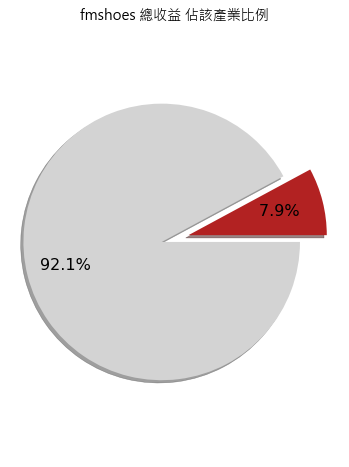

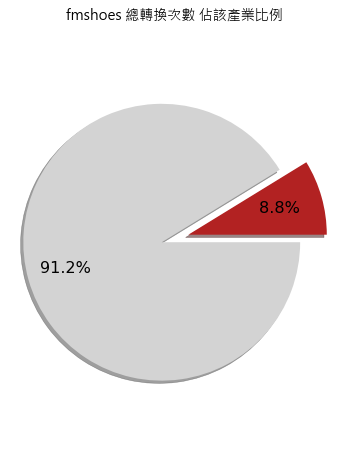

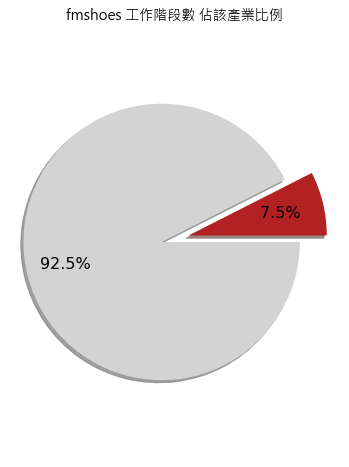

In [12]:
ec.pie_indCompare_sum(df=df_ind_rev, cli_id=int(ind_cli_id), client_name=str(ind_client_name), col='value', 
                   fontproperties=fontproperties, title='總收益')

ec.pie_indCompare_count(df=df_ind_rev, cli_id=int(ind_cli_id), client_name=str(ind_client_name), col='type', 
                   fontproperties=fontproperties, title='總轉換次數')

ec.pie_indCompare_count(df=df_ind, cli_id=int(ind_cli_id), client_name=str(ind_client_name), col='type', 
                   fontproperties=fontproperties, title='工作階段數')


### 2. 重點平均指標比較：
平均每個不重複工作階段之瀏覽數 / 平均每位買家下單數 / 客單價 / 轉換率

```
bar_indCompare_(
    df, 
    fontproperties, 
    cli_id, 
    client_name, 
    col, 
    unit_name, 
    figHeight=3, 
    figWidth=8)
    
bar_indCompare_multiDf(
    df_pv, 
    df_pur, 
    fontproperties, 
    cli_id, 
    client_name, 
    col, 
    unit_name, 
    figHeight=3, 
    figWidth=8)
```

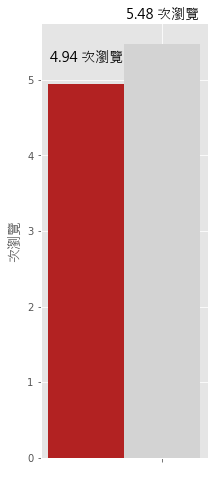

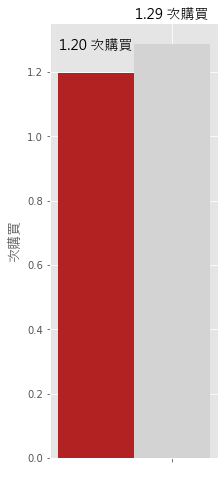

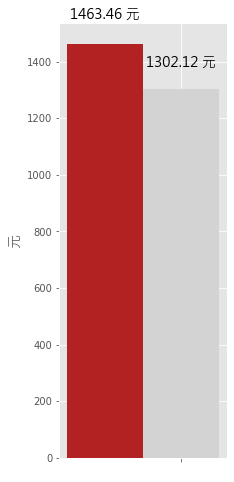

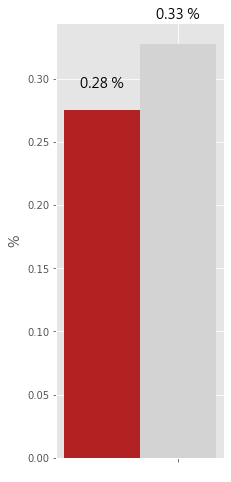

In [17]:
bar_indCompare_(df=df_ind, fontproperties=fontproperties, cli_id=int(ind_cli_id), 
                client_name=str(ind_client_name), col='track_user', unit_name='次瀏覽', figHeight=3, figWidth=8)

bar_indCompare_(df=df_ind_rev, fontproperties=fontproperties, cli_id=int(ind_cli_id), 
                client_name=str(ind_client_name), col='track_user', unit_name='次購買', figHeight=3, figWidth=8)

bar_indCompare_aov(df=df_ind_rev, fontproperties=fontproperties, cli_id=int(ind_cli_id), 
                client_name=str(ind_client_name), col='value', unit_name='元', figHeight=3, figWidth=8)

bar_indCompare_multiDf(df_pv=df_ind, df_pur=df_ind_rev, fontproperties=fontproperties, cli_id=int(ind_cli_id), 
                client_name=str(ind_client_name), col='track_user', unit_name='%', figHeight=3, figWidth=8)


### 3. 時間序列：
瀏覽 / 轉換 / 轉換率 / 客單價

In [18]:
df_cli_pv = df_ind[df_ind['advertiser_id'] == int(ind_cli_id)]
df_cli_pur = df_ind_rev[df_ind_rev['advertiser_id'] == int(ind_cli_id)]
df_pv_byhour = ec.genPercentDf(df_ind, df_cli_pv, ind_client_name)
df_pur_byhour = ec.genPercentDf(df_ind_rev, df_cli_pur, ind_client_name)


```
chart_indCompareByHour(
    df_pv_byhour, 
    client_name, 
    figWidth=20, 
    figHeight=12, 
    left_y_label='瀏覽量於24小時之百分比', 
    fontproperties=fontproperties, 
    fontsize=20)

```

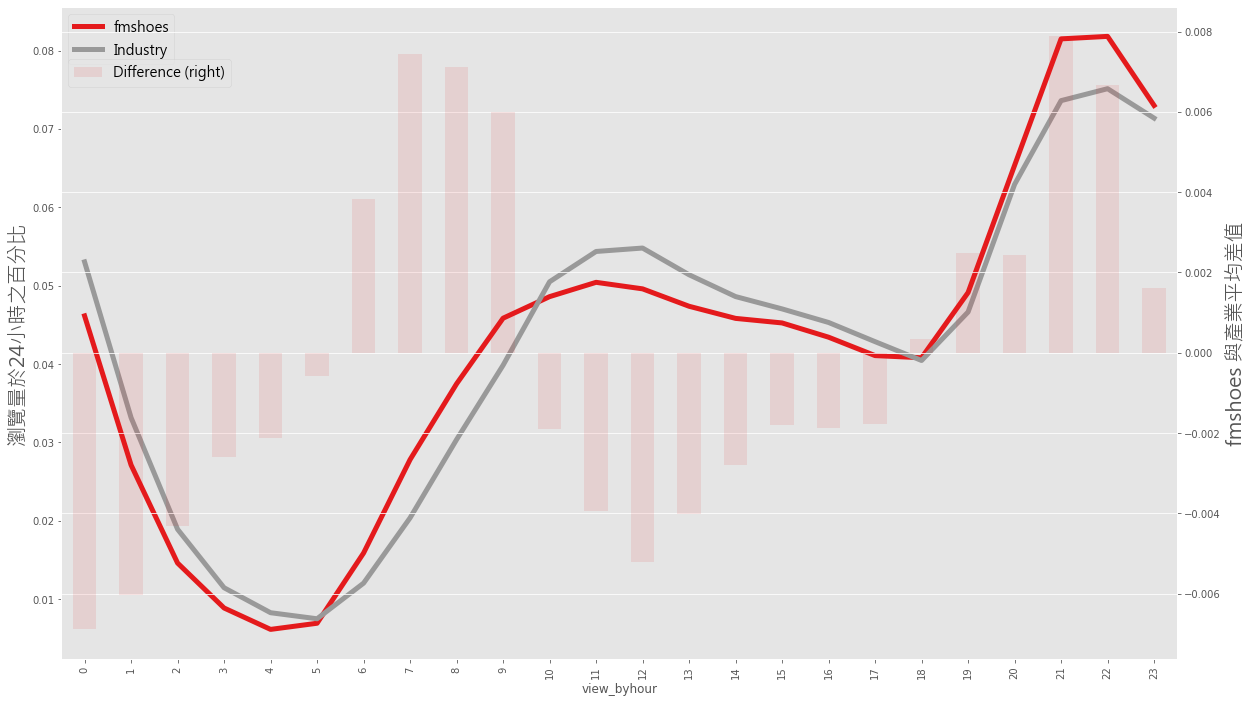

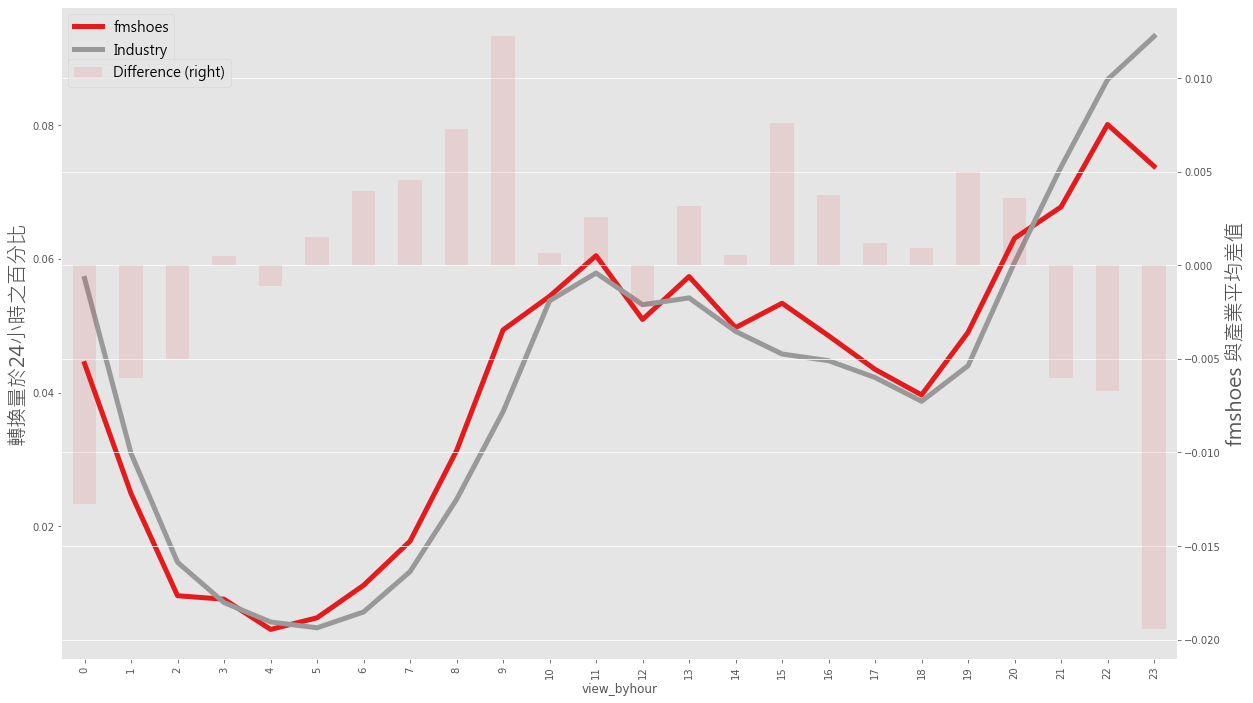

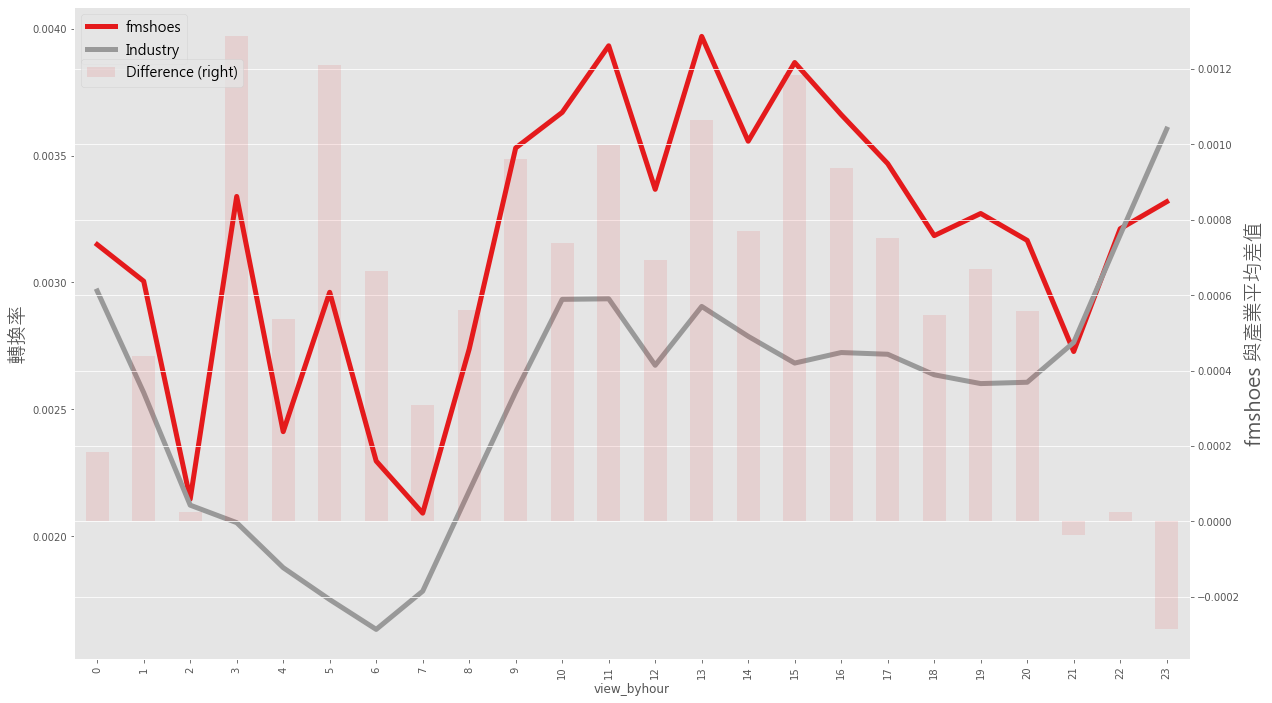

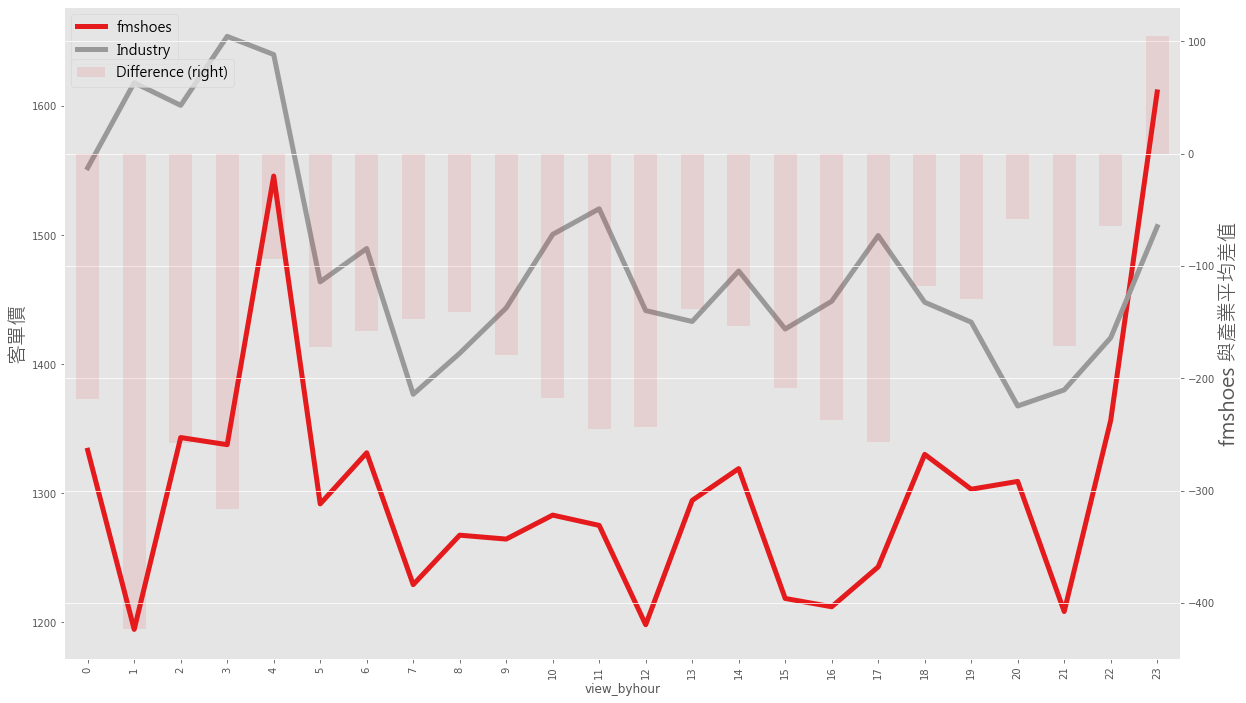

In [84]:
# 瀏覽
ec.chart_indCompareByHour(df_pv_byhour, client_name=ind_client_name, figWidth=20, figHeight=12, 
                       left_y_label='瀏覽量於24小時之百分比', fontproperties=fontproperties, fontsize=20)

# 轉換
ec.chart_indCompareByHour(df_pur_byhour, ind_client_name, left_y_label='轉換量於24小時之百分比')

# 轉換率
df_ctr_byhour = pd.DataFrame({
        str(ind_client_name): ec.df24hr_count(df_cli_pur)[0] / ec.df24hr_count(df_cli_pv)[0],
        'Industry': ec.df24hr_count(df_ind_rev)[0] / ec.df24hr_count(df_ind)[0]
    })
df_ctr_byhour['difference'] = df_ctr_byhour[str(ind_client_name)] - df_ctr_byhour['Industry']
df_ctr_byhour = df_ctr_byhour.reset_index()
ec.chart_indCompareByHour(df_ctr_byhour, ind_client_name, left_y_label='轉換率')

# 客單價
df_aov_byhour = pd.DataFrame({
        str(ind_client_name): ec.df24hr_sum(df_cli_pur, 'value')[0] / ec.df24hr_count(df_cli_pur)[0],
        'Industry': ec.df24hr_sum(df_ind_rev, 'value')[0] / ec.df24hr_count(df_ind_rev)[0]
    })
df_aov_byhour['difference'] = df_aov_byhour[str(ind_client_name)] - df_aov_byhour['Industry']
df_aov_byhour = df_aov_byhour.reset_index()
ec.chart_indCompareByHour(df_aov_byhour, ind_client_name, left_y_label='客單價')


## User Grouping
### 1-1. 用戶分組標籤

主力組
潛力組
猶豫組
路人組
VIP

In [22]:
t = ec.freqTable(df_inter)
vt = df_inter.groupby(['track_user'])['value'].sum().reset_index().sort_values('value', ascending=False)
# 2020.01.21 updated: VIP只計入 value>0 的用戶
vt = vt[vt['value'] > 0]
FU = t[(t['track_times'] > ec.findMedian(ec.reverseFreqTable(t, 'track_times', 'track_user'), 'track_times', 50))].track_user.values
NFU = t[(t['track_times'] <= ec.findMedian(ec.reverseFreqTable(t, 'track_times', 'track_user'), 'track_times', 50))].track_user.values
FP = t[(t['trans_times'] > ec.findMedian(ec.reverseFreqTable(t, 'trans_times', 'track_user'), 'trans_times', 50))].track_user.values
NFP = t[(t['trans_times'] <= ec.findMedian(ec.reverseFreqTable(t, 'trans_times', 'track_user'), 'trans_times', 50))].track_user.values
VIP = vt[(vt['value'] > ec.findMedian(ec.reverseFreqTable(vt, 'value', 'track_user'), 'value', 20))].track_user.values
print('50%的用戶瀏覽 ', U_rule, '次 / 50%的用戶購買 ', P_rule, '次 / 在所有購買者中，前20%高消費族群至少每人花了 ', VIP_rule, '元')
print('totalUserNum: ', len(t), ' . FU: ', len(FU), ' / NFU: ', len(NFU), ' / FP: ', len(FP), ' / NFP: ', len(NFP), ' / VIP: ', len(VIP))
print('0 主力組: ', len(set(FU)&set(FP)), ' / 1 潛力組: ', len(set(NFU)&set(FP)), ' / 2 猶豫組 : ', len(set(FU)&set(NFP)), ' / 3 路人組: ', len(set(NFU)&set(NFP)), ' . TotalNum: ', len(set(FU)&set(FP))+len(set(FU)&set(NFP))+len(set(NFU)&set(FP))+len(set(NFU)&set(NFP)))

df_inter = ec.labelUserGroup(df_inter, 'track_user', FU, FP, NFU, NFP, VIP)
df_outer = ec.labelUserGroup(df_outer, 'track_user', FU, FP, NFU, NFP, VIP)


totalUserNum:  1477580  . FU:  366434  / NFU:  1111146  / FP:  11620  / NFP:  1465960  / VIP:  2291
0 主力組:  8290  / 1 潛力組:  3330  / 2 猶豫組 :  358144  / 3 路人組:  1107816  . TotalNum:  1477580


### 1-2. 將標好的 user record tables回存到Google Storage
> gcloud auth: 


- 待優化：先切分csv後用StringIO存、像bigQuery方式輸出多個檔案到bucket

In [23]:
# specific column encoding: 由於StringIO存入中文會遇到encoding error, 故先將中文做'utf-8'編碼
df_inter['page'] = df_inter['page'].astype(str)
df_inter['page'] = df_inter['page'].apply(lambda x: x.encode('utf-8'))
df_inter['page_key'] = df_inter['page_key'].astype(str)
df_inter['page_key'] = df_inter['page_key'].apply(lambda x: x.encode('utf-8'))

df_outer['page'] = df_outer['page'].astype(str)
df_outer['page'] = df_outer['page'].apply(lambda x: x.encode('utf-8'))
df_outer['page_key'] = df_outer['page_key'].astype(str)
df_outer['page_key'] = df_outer['page_key'].apply(lambda x: x.encode('utf-8'))


In [24]:
# 2020.01.21 updated: 上傳最新的user label tables
df_inter_filename = f'{cli_id}_Visitor_{default_start_date}_{default_end_date}_internal_viewRecords.csv'
df_outer_filename = f'{cli_id}_Visitor_{default_start_date}_{default_end_date}_crossIndustry_viewRecords.csv'
upload_gs.upload_StringIO(df_inter, bq_project, 'tagtoo-bigquery-export', f'ECAnalysis/upload/{df_inter_filename}')
upload_gs.upload_StringIO(df_outer, bq_project, 'tagtoo-bigquery-export', f'ECAnalysis/upload/{df_outer_filename}')


File ECAnalysis/upload/1253_Visitor_201906_201912_internal_viewRecords.csv uploaded to tagtoo-bigquery-export.
File ECAnalysis/upload/1253_Visitor_201906_201912_crossIndustry_viewRecords.csv uploaded to tagtoo-bigquery-export.


### 1-3. 從Google Storage載入有分組標籤的csv檔

In [4]:
df_inter_filename = f'{cli_id}_Visitor_{default_start_date}_{default_end_date}_internal_viewRecords.csv'
df_outer_filename = f'{cli_id}_Visitor_{default_start_date}_{default_end_date}_crossIndustry_viewRecords.csv'
dataUrl_df_inter = f'gs://tagtoo-bigquery-export/ECAnalysis/upload/{df_inter_filename}'
dataUrl_df_outer = f'gs://tagtoo-bigquery-export/ECAnalysis/upload/{df_outer_filename}'
df_interL = ec.queryFromBQ(dataUrl_df_inter)
df_interL.head()
df_outerL = ec.queryFromBQ(dataUrl_df_outer)
df_outerL.head()

df_outerL_list = ec.splitUserGroupDf(df_outerL, 'userGroup')
df_outerL_list_TRANS = ec.splitUserGroupDf(df_outerL[df_outerL['type'] == 'transaction'], 'userGroup')
df_outerL_listVIP = ec.splitUserGroupDf(df_outerL, 'vip')
df_outerL_listVIP_TRANS = ec.splitUserGroupDf(df_outerL[df_outerL['type'] == 'transaction'], 'vip')


Amount of data:  3555805
Loading Time = 36.09859371185303


Unnamed: 0        track_user        pageview_time        date  \
0           3  qsqfbliem3uzbl9n  2019-09-22 15:07:42  2019-09-22   
1          11  kcz9d90yzelj9nr3  2019-12-25 06:28:32  2019-12-25   
2          12  cy90cfpipn5jsh68  2019-09-24 17:35:32  2019-09-24   
3          15  6n4iz4z0r4iaqh9i  2019-12-19 16:15:30  2019-12-19   
4          22  4p2ffr0hrn8nkfqn  2019-11-05 20:25:14  2019-11-05   

   view_bymonth  view_byday  view_byweekday_num  view_byhour  \
0             9          22                   1           15   
1            12          25                   4            6   
2             9          24                   3           17   
3            12          19                   5           16   
4            11           5                   3           20   

                                                page   type ...        os  \
0  b'https://www.drqq.toys/categories/%E5%A5%B3%E...  track ...   Windows   
1  b'https://www.drqq.toys/products/%E5%B0%8D%E5%...  track ...   Android   
2  b'https://www.drqq.toys/blog/posts/%E7%B6%B2%E...  track ...   Android   
3  b'https://www.drqq.toys/?utm_source=TF&utm_med...  track ...   Android   
4  b'https://www.drqq.toys/?utm_source=TF&utm_med...  track ...       iOS   

  device                                           page_key value num_items  \
0  Other  b'drqq:category:%e5%a5%b3%e6%80%a7%e6%83%85%e8...   NaN       NaN   
1  Other   b'drqq:product:cf563011cd61c474024f1392e0fb9e40'   NaN       NaN   
2  Other                                    b'drqq:unknown'   NaN       NaN   
3  HTC U                                    b'drqq:unknown'   NaN       NaN   
4   iPad                                    b'drqq:unknown'   NaN       NaN   

   referrer  deviceCategory industry_id userGroup  vip  
0   organic              pc          23         2    0  
1   otherAD          mobile          23         2    0  
2   organic          mobile          23         2    0  
3   otherAD          mobile          23         2    0  
4   otherAD          tablet          23         3    0  

[5 rows x 22 columns]

Amount of data:  3795506
Loading Time = 32.900609254837036


Unnamed: 0        track_user        pageview_time        date  \
0           0  4hhfr6koao4n8eti  2019-12-12 16:18:26  2019-12-12   
1           7  c77sa2fuslmmfm8t  2019-12-09 19:53:11  2019-12-09   
2          19  260ds0f52x3a0n4i  2019-12-27 10:14:49  2019-12-27   
3          38  551ye7rydinxzia3  2019-12-05 21:50:37  2019-12-05   
4          39  ioq5924lmenibjgs  2019-12-24 12:14:47  2019-12-24   

   view_bymonth  view_byday  view_byweekday_num  view_byhour  \
0            12          12                   5           16   
1            12           9                   2           19   
2            12          27                   6           10   
3            12           5                   5           21   
4            12          24                   3           12   

                                                page   type ...         os  \
0  b'https://www.momoshop.com.tw/category/DgrpCat...  track ...   Mac OS X   
1             b'https://tw.myrenta.com/read/90722/1'  track ...    Windows   
2  b'https://www.momoshop.com.tw/category/DgrpCat...  track ...    Windows   
3  b'https://www.shtickinc.com/Common/CustomPage....  track ...   Mac OS X   
4  b'https://m.momoshop.com.tw/goods.momo?i_code=...  track ...    Android   

   device              page_key value num_items  referrer  deviceCategory  \
0   Other                b'nan'   NaN       NaN   organic              pc   
1   Other    b'myrenta:unknown'   NaN       NaN   organic              pc   
2   Other                b'nan'   NaN       NaN   organic              pc   
3   Other  b'shtickinc:unknown'   NaN       NaN   organic              pc   
4  PAAM00                b'nan'   NaN       NaN   organic          mobile   

  industry_id userGroup  vip  
0          23         3    0  
1          10         2    0  
2          23         3    0  
3           4         3    0  
4          23         2    0  

[5 rows x 22 columns]

### 1-4. 用戶分組佔比 

In [26]:
df_groups = df_inter[['track_user','userGroup','vip']]
df_groups = df_groups.drop_duplicates()
unique_user = len(df_groups)
print(f'unique_user: {unique_user}')


unique_user: 1477580


In [27]:
df_groups_pct = df_groups.groupby('userGroup').count()
df_groups_pct['pct'] = df_groups_pct['track_user'] / unique_user * 100
df_groups_pct = df_groups_pct[['track_user','pct']]

vip = df_groups[df_groups['vip']==1]
unique_vip = len(vip)
vip = vip.groupby('userGroup').count()
vip['vip_pct'] = vip['vip'] / unique_vip *100

df_groups_pct['unique_vip'] = vip['vip']
df_groups_pct['vip_pct'] = vip['vip_pct']
df_groups_pct.columns=[['uniquer_user','pct','unique_vip','vip_pct']]
df_groups_pct = df_groups_pct.fillna(0)
df_groups_pct


uniquer_user        pct unique_vip    vip_pct
userGroup                                              
0                 8290   0.561053     2127.0  92.841554
1                 3330   0.225369      164.0   7.158446
2               358144  24.238552        0.0   0.000000
3              1107816  74.975027        0.0   0.000000

### 2. 全產業消費力

In [28]:
check_userGroup = ec.printAOVByGroup(df_outer, 'userGroup', 1, 100000)
check_vip = ec.printAOVByGroup(df_outer, 'vip', 1, 100000)


userGroup
0    3111.490446
1     414.000000
2    2727.907653
3    3193.738684
dtype: float64
vip
0    2969.699814
1    4740.377778
dtype: float64


### 3-1. 跨產業瀏覽分佈圖
- cross industry distribution：產生各組的實際人數分佈，並繪圖(4+1)
> FVFP：Frequent-View-Frequent-Purchase
> 
> NVNP：Nonfrequent-View-Nonfrequent-Purchase

In [21]:
# Debug 使用
# %run EC_AllReportFunctions.py

In [11]:
d = ec.genGroupDistribution(df_outerL, label_col='userGroup', byColumn='industry_id')
d = d.pivot(index='industry_id', columns='userGroup', values='track_user')
d = d.reset_index()
d.columns = ['industry_id','FVFP','NVFP','FVNP','NVNP']

dv = ec.genGroupDistribution(df_outerL, label_col='vip', byColumn='industry_id')
dv = dv[dv['vip'] == 1]
dv = dv.drop('vip', axis=1)
dv.columns = ['industry_id','VIP']

visit_dis_table = pd.merge(d, dv, on='industry_id', how='outer')
visit_dis_table = visit_dis_table.fillna(0)
visit_dis_table = visit_dis_table.astype(int)


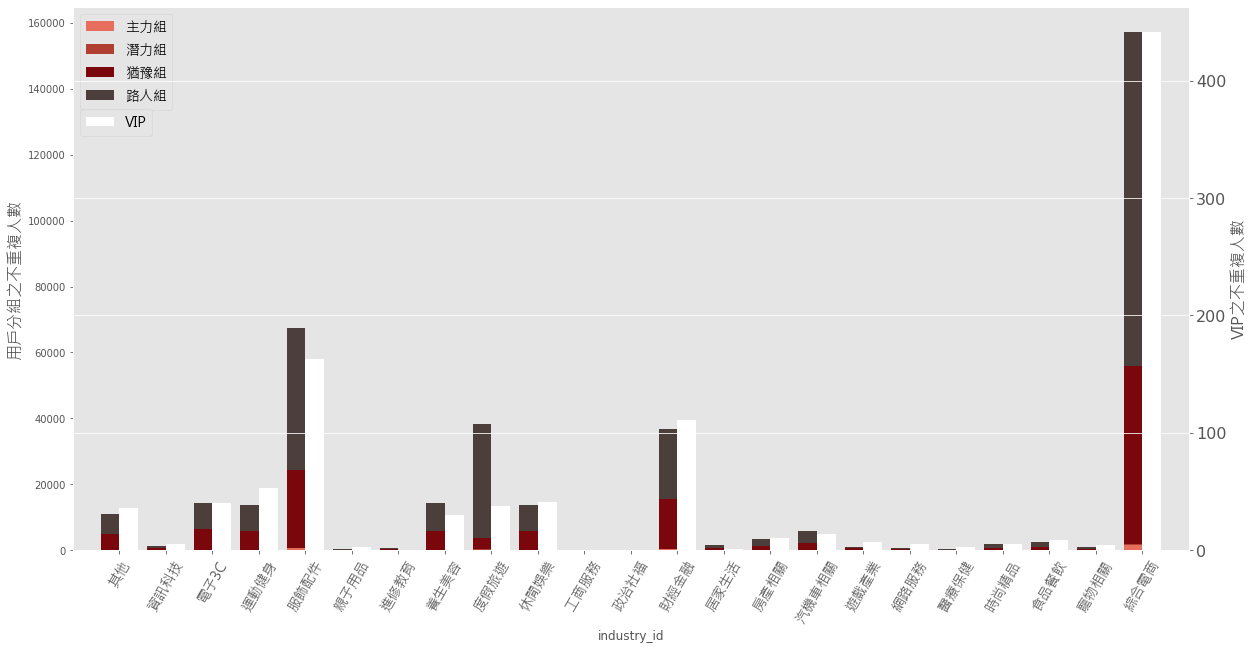

industry_id  FVFP  NVFP   FVNP    NVNP  VIP
0             0   153     3   4694    6050   36
1             1    12     0    509     685    5
2             2   158     3   6189    7900   40
3             3   177    10   5651    7885   53
4             4   647    78  23657   42995  163
5             5     7     1    138     265    3
6             6     6     0    277     369    0
7             8   167     8   5654    8344   30
8             9   101   192   3376   34530   38
9            10   126    10   5729    7990   41
10           11     0     0     29      63    0
11           12     0     0      6       8    0
12           13   403     8  15209   21123  111
13           14    12     1    655     968    1
14           15    25     1   1390    2127   10
15           16    54     1   2263    3379   14
16           17    20     0    518     537    7
17           18     7     2    323     467    5
18           19     7     0    193     274    3
19           20    29     3    676    1084    5
20           21    29     2   1029    1467    9
21           22    14     0    478     601    4
22           23  1547   205  54089  101250  441

In [22]:
ec.crossIndDisStackedChart(visit_dis_table, industry_dict, fontproperties, byColumn='industry_id', exclude_ind=None, figWidth=20, figHeight=10)
visit_dis_table


### 3-2. 跨產業轉換分佈圖

In [23]:
t = ec.genGroupDistribution(df_outerL[df_outerL['type'] == 'transaction'], label_col='userGroup', byColumn='industry_id')
t = t.pivot(index='industry_id', columns='userGroup', values='track_user')
t = t.reset_index()
t.columns = ['industry_id','FVFP','NVFP','FVNP','NVNP']

tv = ec.genGroupDistribution(df_outerL[df_outerL['type'] == 'transaction'], label_col='vip', byColumn='industry_id')
tv = tv[tv['vip'] == 1]
tv = tv.drop('vip', axis=1)
tv.columns = ['industry_id','VIP']

pur_dis_table = pd.merge(t, tv, on='industry_id', how='outer')
pur_dis_table = pur_dis_table.fillna(0)
pur_dis_table = pur_dis_table.astype(int)


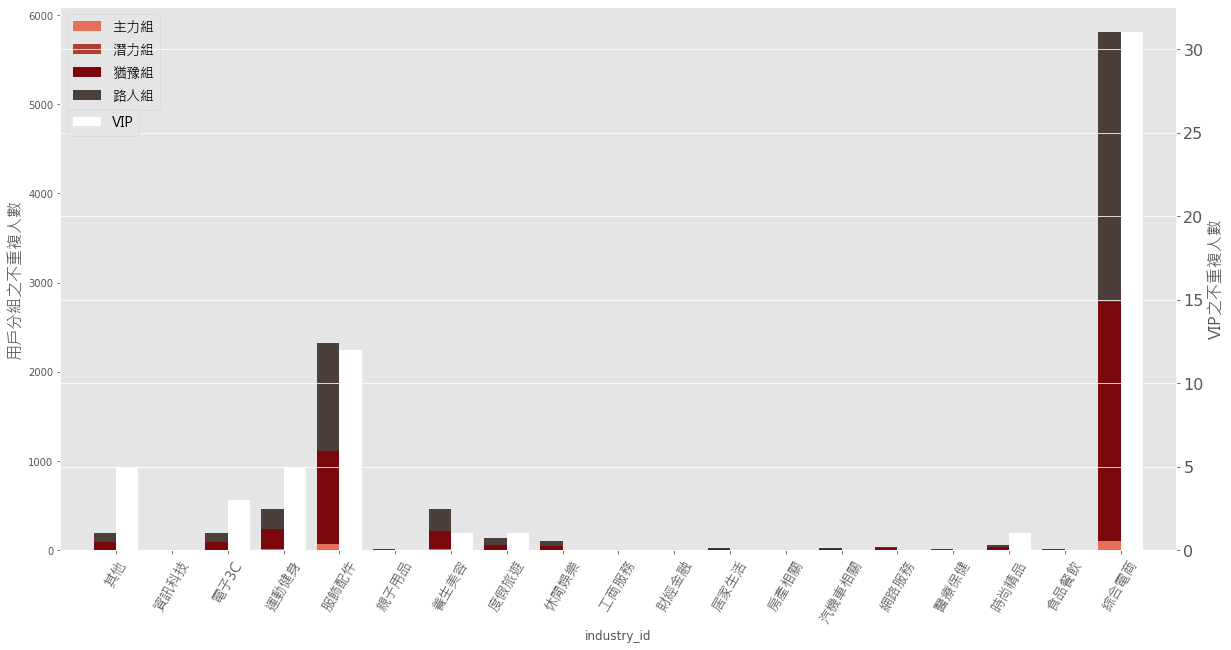

industry_id  FVFP  NVFP  FVNP  NVNP  VIP
0             0     6     0    83    99    5
1             1     0     0     0     5    0
2             2     5     0    92    97    3
3             3    11     0   226   221    5
4             4    68     1  1043  1216   12
5             5     0     0     4     5    0
6             8    14     0   200   250    1
7             9     2     0    57    81    1
8            10     1     0    48    54    0
9            11     0     0     1     1    0
10           13     0     0     0     2    0
11           14     0     0     8    21    0
12           15     0     0     6     1    0
13           16     0     0    13     8    0
14           18     1     0    19    11    0
15           19     0     0     3     9    0
16           20     4     0    30    25    1
17           21     0     0     6     9    0
18           23   100     0  2680  3024   31

In [24]:
ec.crossIndDisStackedChart(pur_dis_table, industry_dict, fontproperties, byColumn='industry_id', exclude_ind=None, figWidth=20, figHeight=10)
pur_dis_table


### 4-1. 跨產業瀏覽傾向圖


11
11


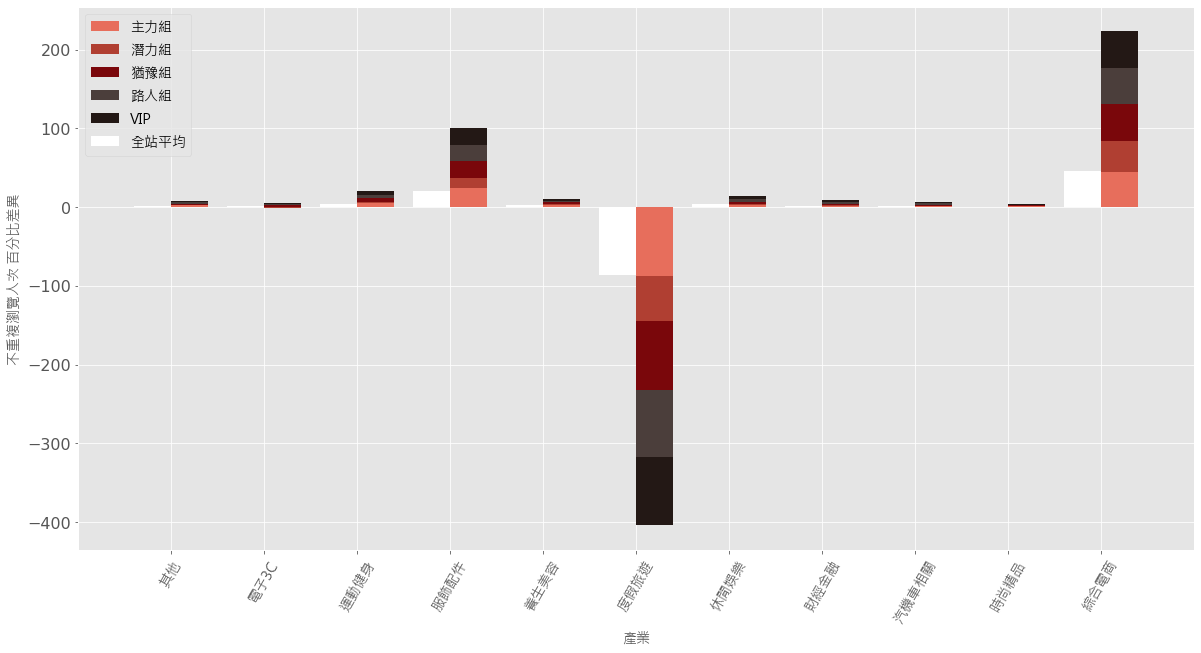

In [8]:
df_ind_compare = ec.genCompareDf_userGroup(df_outerL_list, df_outerL, 'industry_id')
df_ind_compareVIP = ec.genCompareDf_vip(df_outerL_listVIP, df_outerL, 'industry_id')
df_ind_compare = ec.mergeBaseline(df_ind_compare, df_ind_compareVIP, df_tagtoodb_201912_ind_avg_visit, byColumn='industry_id')
df_ind_compareS = ec.filterMeaningfulItem(df_ind_compare)
df_ind_compareS_diff = ec.addDiffCol(df_ind_compareS, baseline_col='TagtooDBAvg', by_col='industry_id')
ec.draw_differencePercent(df_ind_compareS_diff, byColumn='industry_id', ylabel_var='瀏覽', font=fontproperties, industry_dict=industry_dict, pltWidth=20, pltHeight=10, bar_width=0.4, itemNum=len(df_ind_compareS_diff))


### 4-2. 跨產業轉換傾向圖


23
23
11
11


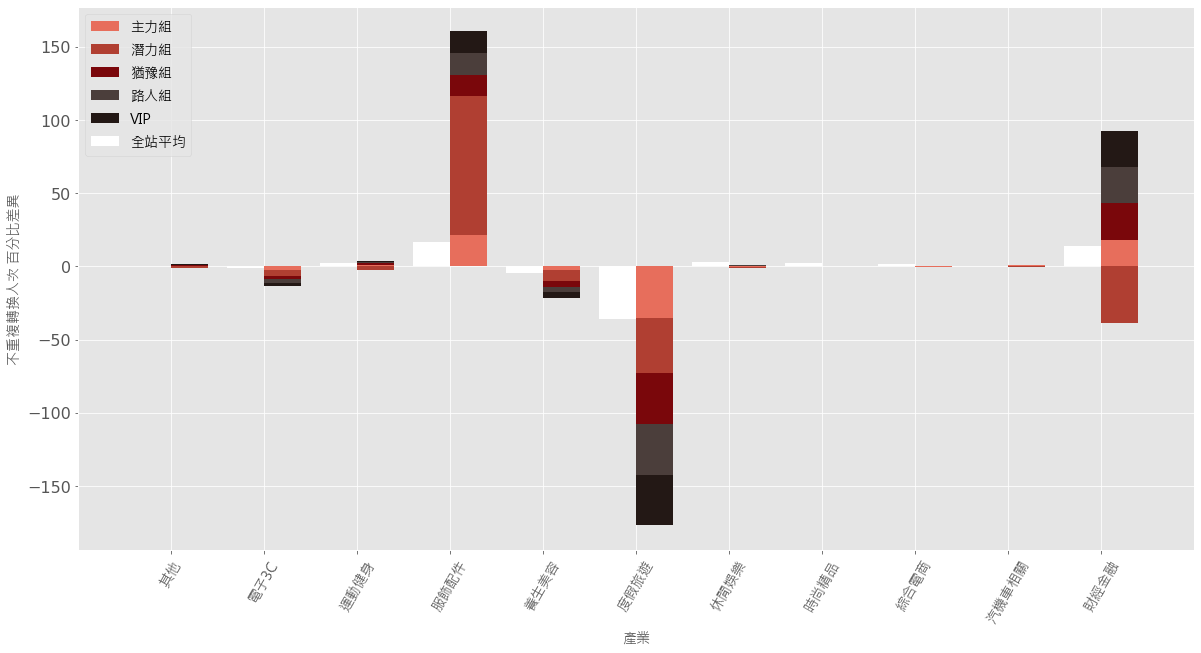

In [9]:
df_ind_compare = ec.genCompareDf_userGroup(df_outerL_list_TRANS, df_outerL, 'industry_id')
df_ind_compareVIP = ec.genCompareDf_vip(df_outerL_listVIP_TRANS, df_outerL, 'industry_id')
df_ind_compare = ec.mergeBaseline(df_ind_compare, df_ind_compareVIP, df_tagtoodb_201912_ind_avg_purchase, byColumn='industry_id')
df_ind_compareS = ec.filterMeaningfulItem(df_ind_compare)
df_ind_compareS_diff = ec.addDiffCol(df_ind_compareS, baseline_col='TagtooDBAvg', by_col='industry_id')
ec.draw_differencePercent(df_ind_compareS_diff, byColumn='industry_id', ylabel_var='轉換', font=fontproperties, industry_dict=industry_dict, pltWidth=20, pltHeight=10, bar_width=0.4, itemNum=len(df_ind_compareS_diff))


> try new method: https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

### 5-1. 跨電商瀏覽傾向圖 (for EC)


284
284
27
20


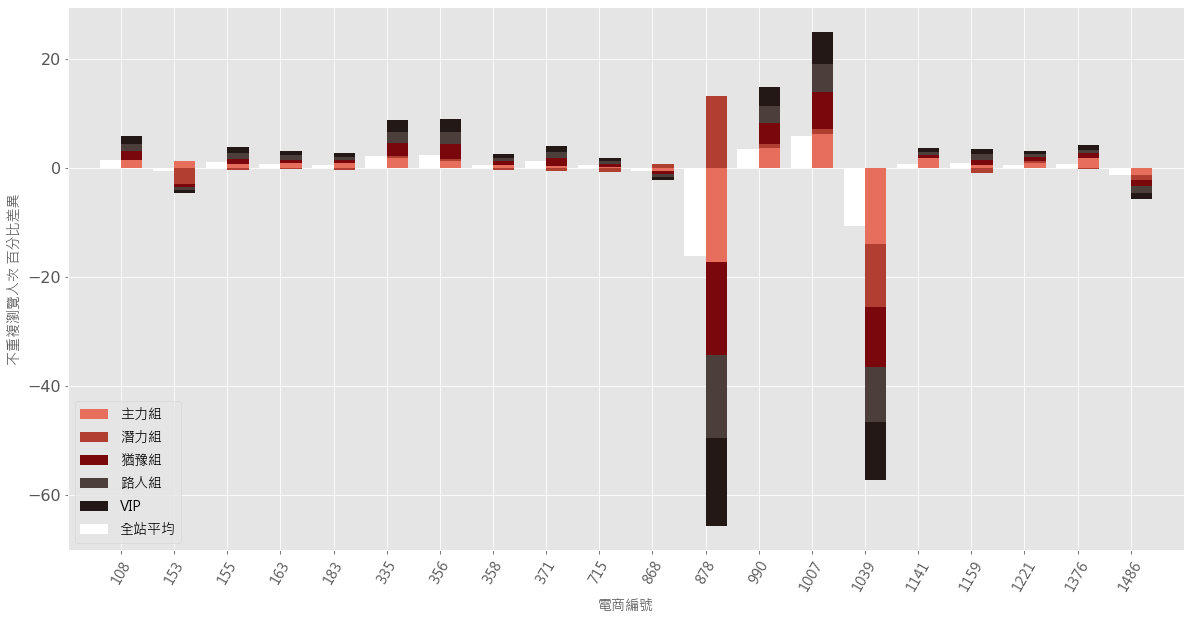

In [10]:
df_ec_compare = ec.genCompareDf_userGroup(df_outerL_list, df_outerL, 'advertiser_id')
df_ec_compareVIP = ec.genCompareDf_vip(df_outerL_listVIP, df_outerL, 'advertiser_id')
df_ec_compare = ec.mergeBaseline(df_ec_compare, df_ec_compareVIP, df_tagtoodb_201912_ec_avg_visit, byColumn='advertiser_id')
df_ec_compareS = ec.filterMeaningfulItem(df_ec_compare)
df_ec_compareS_diff = ec.addDiffCol(df_ec_compareS, baseline_col='TagtooDBAvg', by_col='advertiser_id')
df_ec_compareS_diffS = ec.absTop20Filter(df_ec_compareS_diff, byColumn='advertiser_id', target_col='diff_all')
ec.draw_differencePercent(df_ec_compareS_diffS, byColumn='advertiser_id', ylabel_var='瀏覽', font=fontproperties, industry_dict=None, pltWidth=20, pltHeight=10, bar_width=0.4, itemNum=len(df_ec_compareS_diffS))


### 5-2. 跨電商轉換傾向圖 (for EC)


284
284
30
20


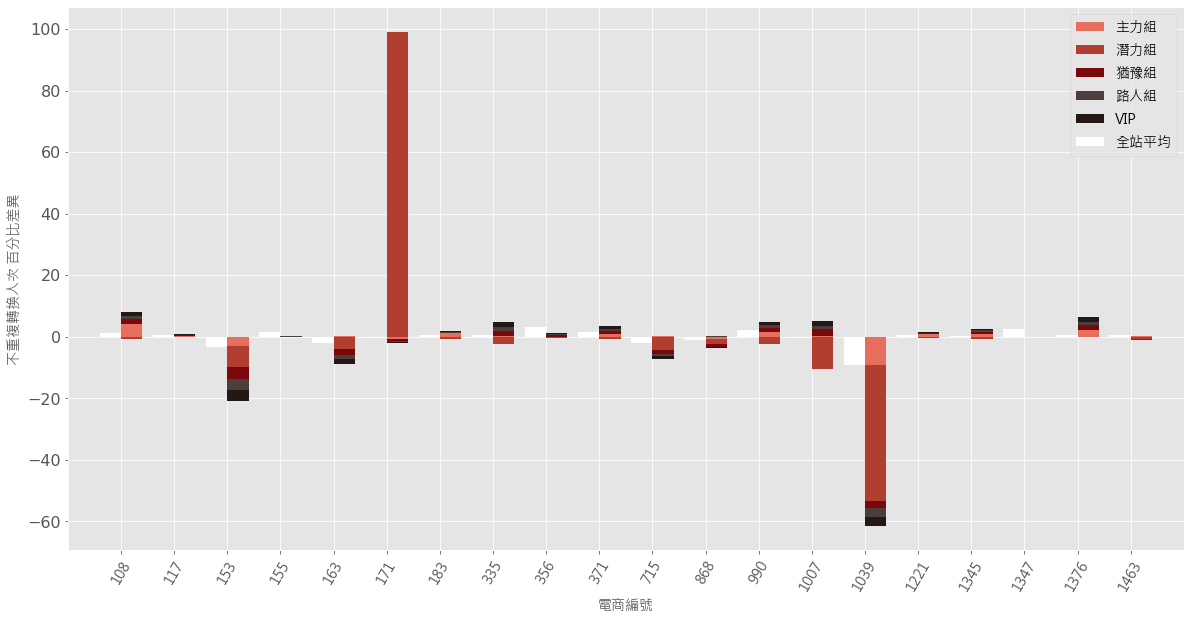

In [11]:
df_ec_compare = ec.genCompareDf_userGroup(df_outerL_list_TRANS, df_outerL, 'advertiser_id')
df_ec_compareVIP = ec.genCompareDf_vip(df_outerL_listVIP_TRANS, df_outerL, 'advertiser_id')
df_ec_compare = ec.mergeBaseline(df_ec_compare, df_ec_compareVIP, df_tagtoodb_201912_ec_avg_purchase, byColumn='advertiser_id')
df_ec_compareS = ec.filterMeaningfulItem(df_ec_compare)
df_ec_compareS_diff = ec.addDiffCol(df_ec_compareS, baseline_col='TagtooDBAvg', by_col='advertiser_id')
df_ec_compareS_diffS = ec.absTop20Filter(df_ec_compareS_diff, byColumn='advertiser_id', target_col='diff_all')
ec.draw_differencePercent(df_ec_compareS_diffS, byColumn='advertiser_id', ylabel_var='轉換', font=fontproperties, industry_dict=None, pltWidth=20, pltHeight=10, bar_width=0.4, itemNum=len(df_ec_compareS_diffS))


### 7. 商周理財健康文章閱讀偏好

In [8]:
s = time.time()
df_bw = ec.queryFromBQ(f'gs://tagtoo-bigquery-export/BusinessWeekly/track_content_jieba/bw_track_{bw_date}')

df_jieba = ec.queryFromBQ(f'gs://tagtoo-bigquery-export/BusinessWeekly/track_content_jieba/df_jieba_bw_{bw_date}')

df_user = df_interL
#df_user = ec.queryFromBQ(f'gs://tagtoo-bigquery-export/ECAnalysis/upload/{df_inter_filename}')
print(f'資料量: %d'%len(df_user))


Amount of data:  8704065
Loading Time = 15.07447075843811
Amount of data:  86147
Loading Time = 1.6361534595489502
資料量: 3555805


In [32]:
s = time.time()
df_m = ec.merge_jieba_bwTrack(df_bw,df_jieba)
print(f'資料量: %d'%len(df_m))
print(f"Loading Time = {time.time()-s}")

資料量: 3309887
Loading Time = 480.5635130405426


In [33]:
#標上使用者標籤
df_user = df_user[['track_user','userGroup','vip']]
df_user.columns = ['user','userGroup','vip']
print(f'資料量 : {len(df_user)}')
df_user = df_user.drop_duplicates()
print(f'資料量 : {len(df_user)}')
df_m = df_m.merge(df_user,on='user',how='left')
print(f'資料量: %d'%len(df_m))

資料量 : 3555805
資料量 : 1477580
資料量: 3309887


In [34]:
# 0: 主力組 , 1: 潛力組 , 2: 猶豫組 , 3: 路人組  ,'vip' : VIP組
#知道每群人的數量

print(df_m.groupby('userGroup').count()['user'])
print('vip:',df_m['vip'].sum())

userGroup
0.0      400
1.0        3
2.0    14890
3.0    19616
Name: user, dtype: int64
vip: 398.0


In [35]:
#灌入Stopwords list

with open('stopwords.csv', 'r') as f:
    reader = csv.reader(f)
    stopwords_list = [r[0] for r in reader]

#手動增加 Stopwords list
manual_stop_list = [',','商周','商周','自學網','Smart','周刊','商業','網','良醫','健康',
                    '『 ','\n','{','}','-','|','(',')',',','˙','..','/','百大','...']
for i in range(len(manual_stop_list)):
    stopwords_list.append(manual_stop_list[i])
    

In [ ]:
#畫商周全站, 因為data 太多只取1萬比數據
df_counter_bw = jieba_generate_wordcloud_freq(df_m[:10000],stopwords_list,font,col='title_all',relative_scaling=1,title="商周全站")

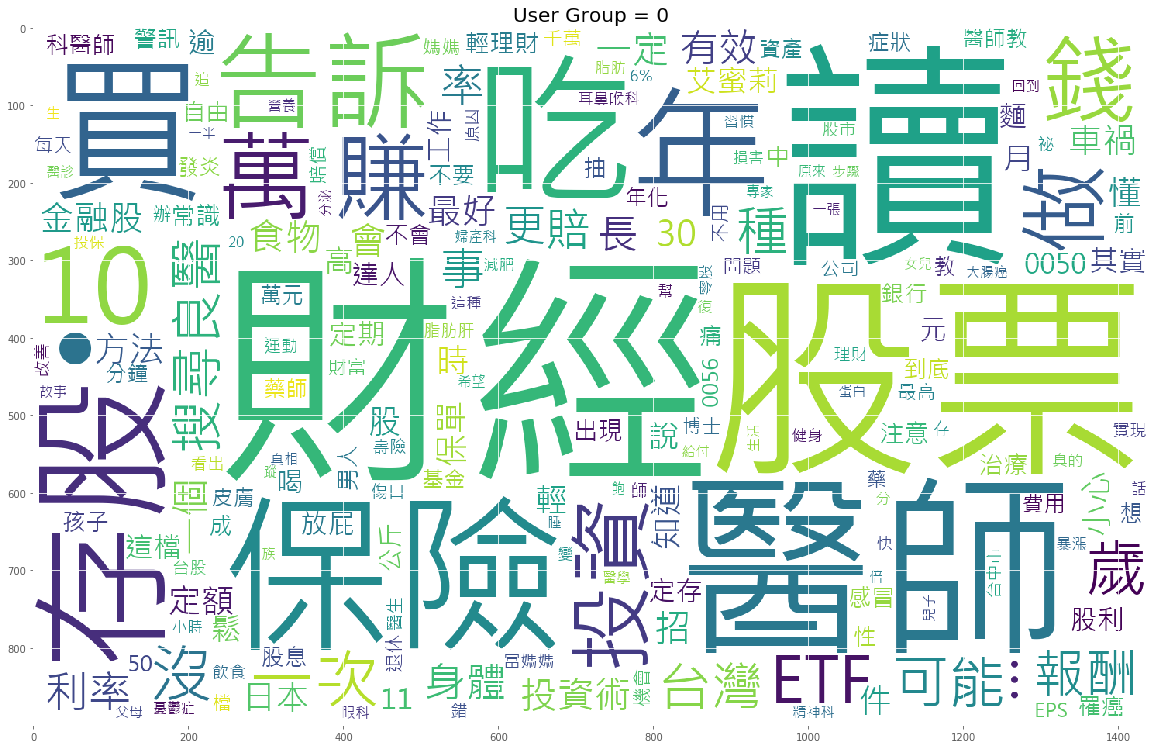

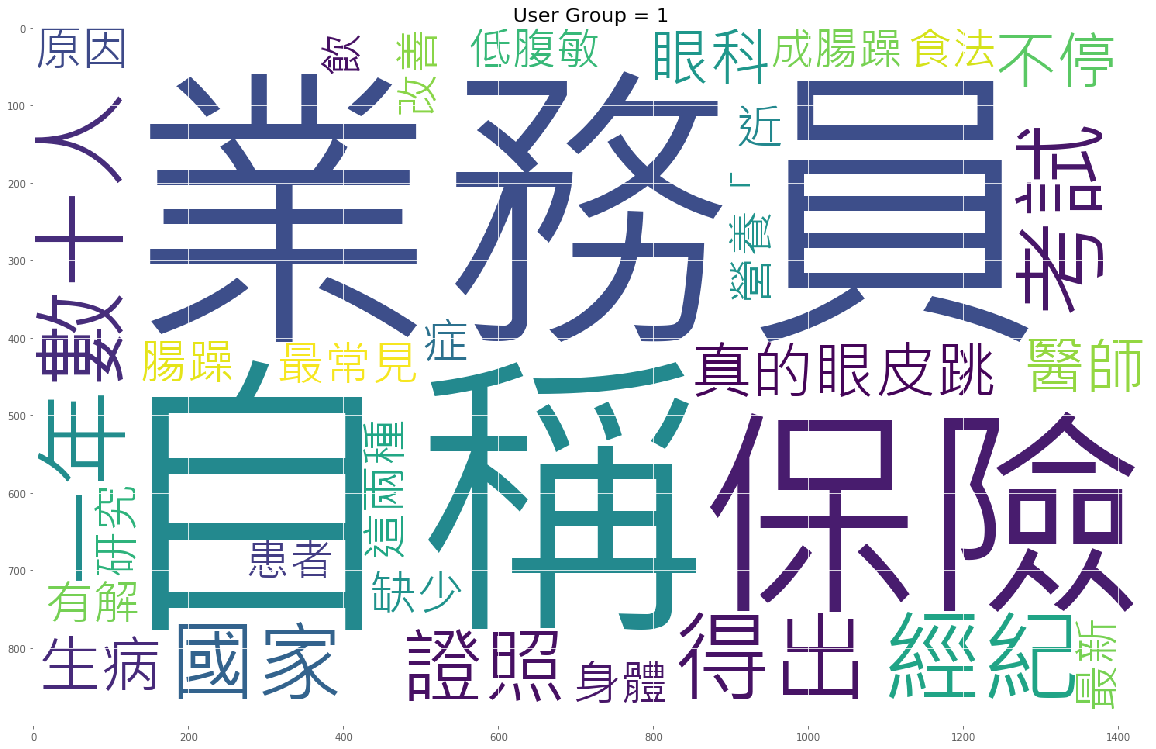

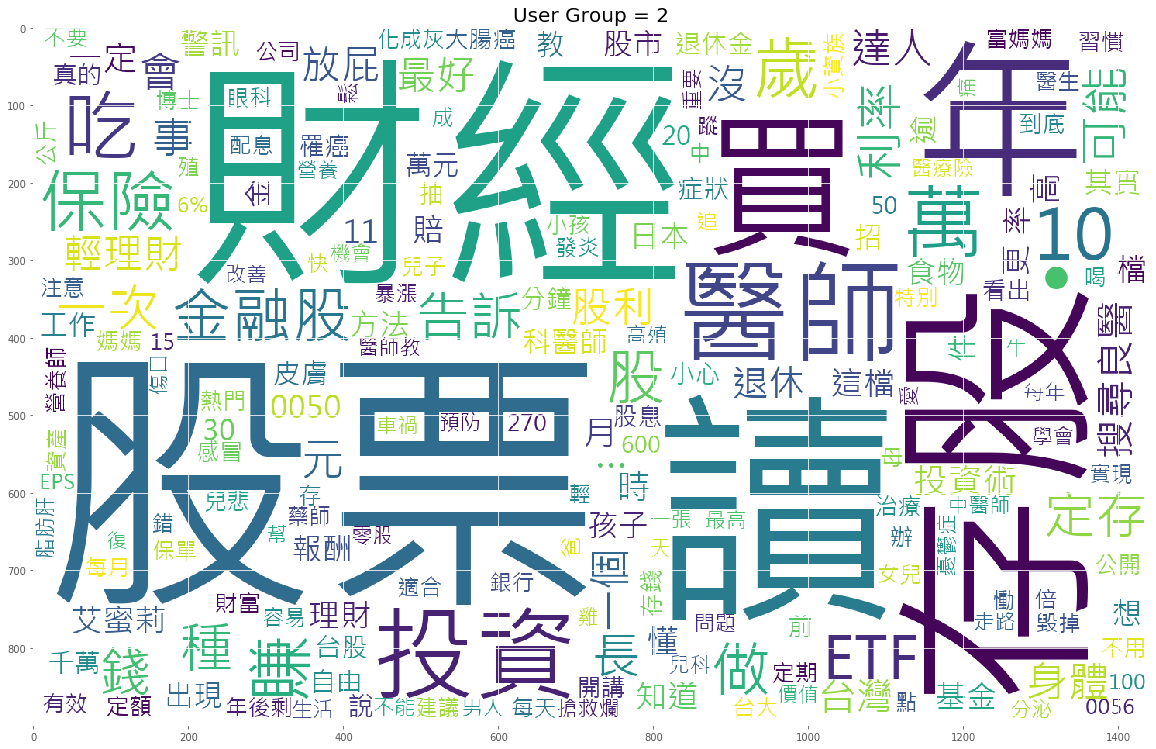

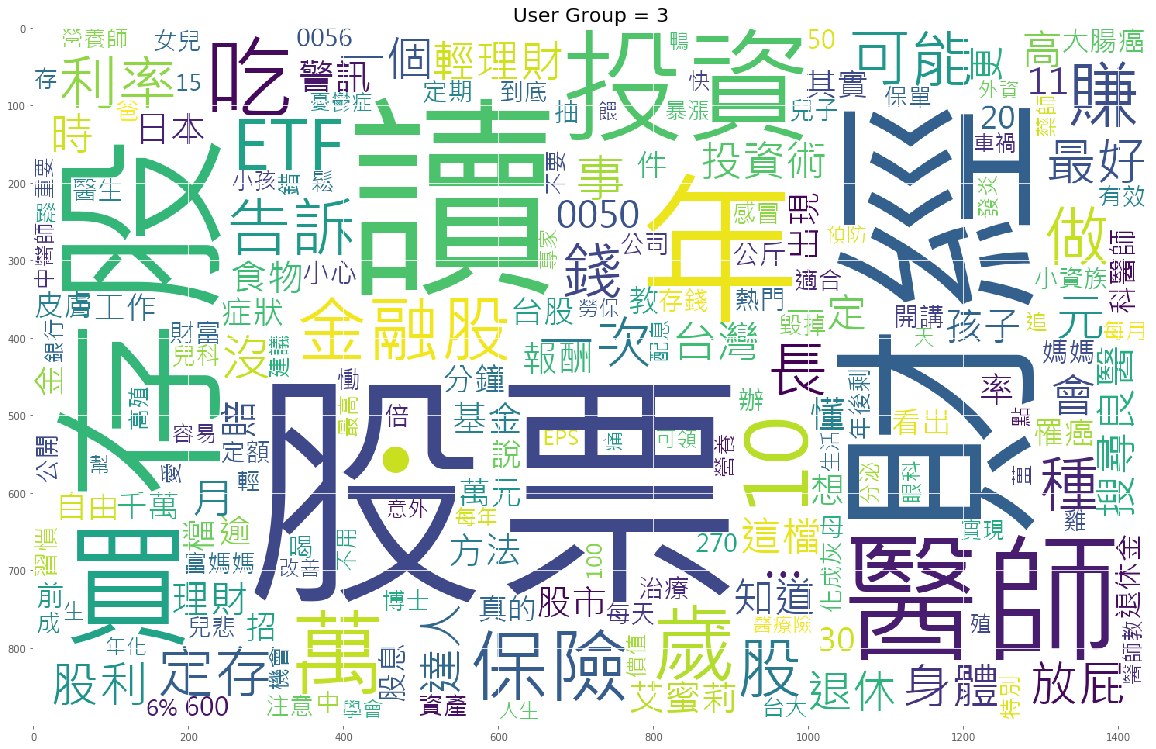

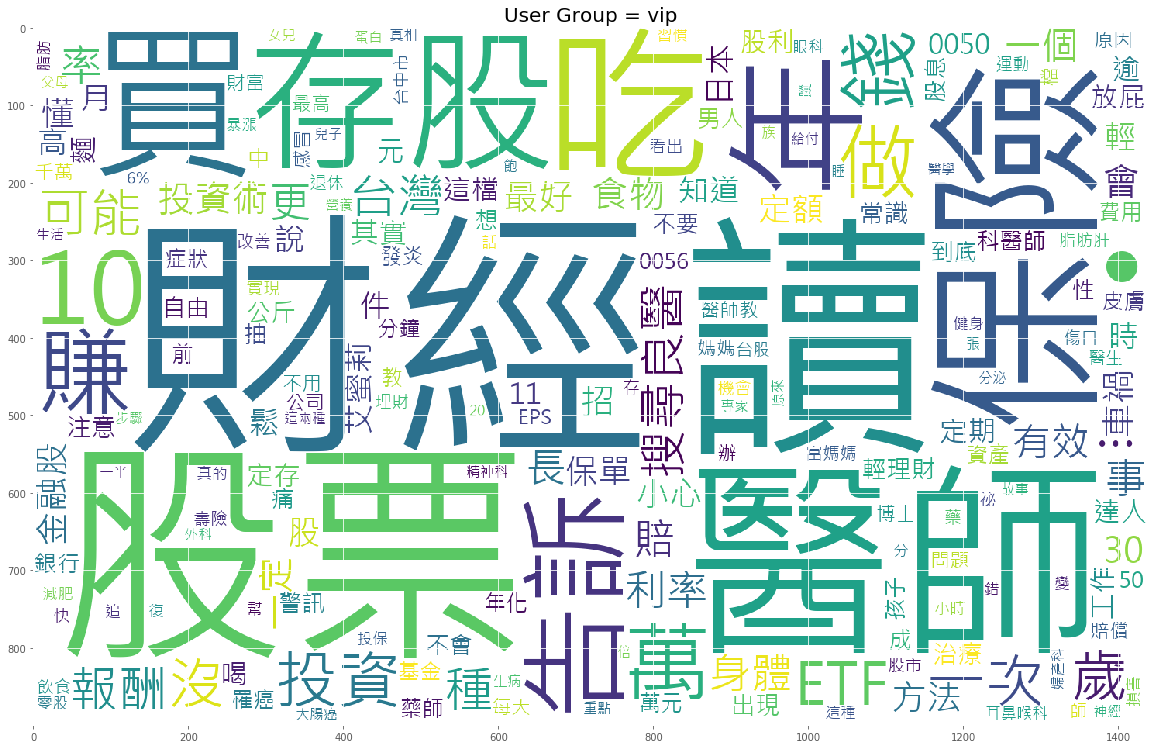

In [78]:
#使用title 畫圖
# 0: 主力組 , 1: 潛力組 , 2: 猶豫組 , 3: 路人組  ,'vip' : VIP組
counter = []
for group in [0,1,2,3,'vip']:
    df_counter = ec.draw_group(df_m,stopwords_list,font,group=group,col='title_all',relative_scaling=1)
    counter.append(df_counter)
    

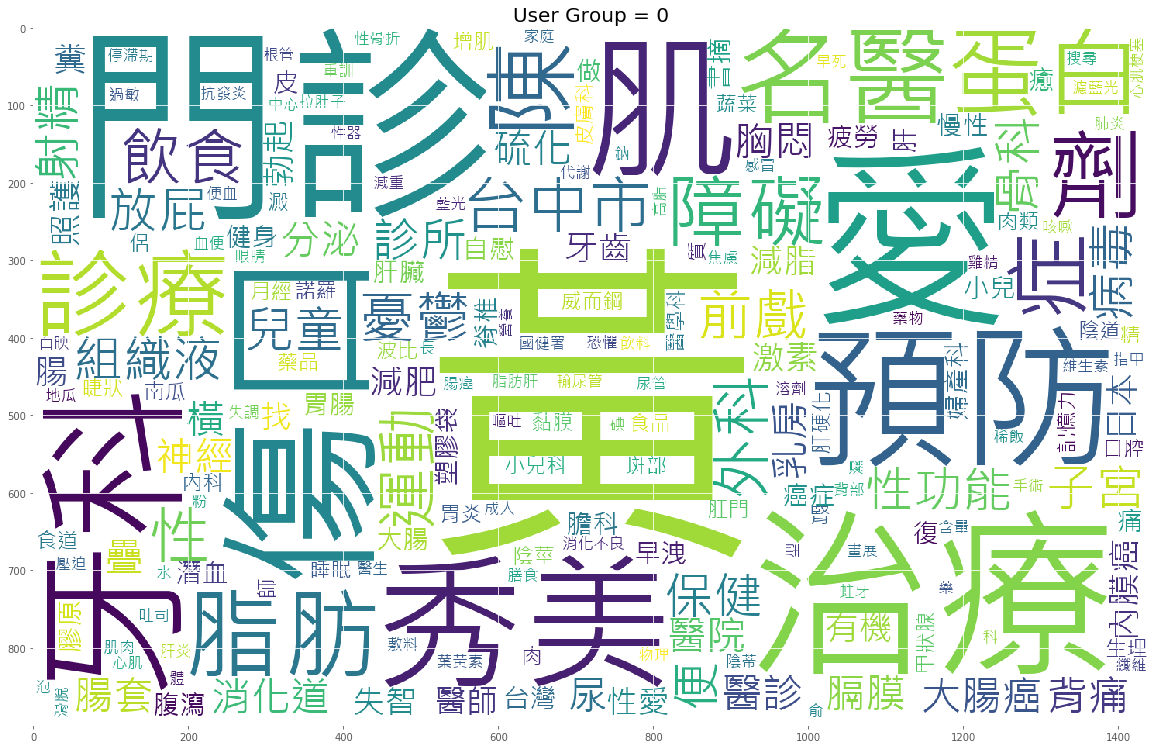

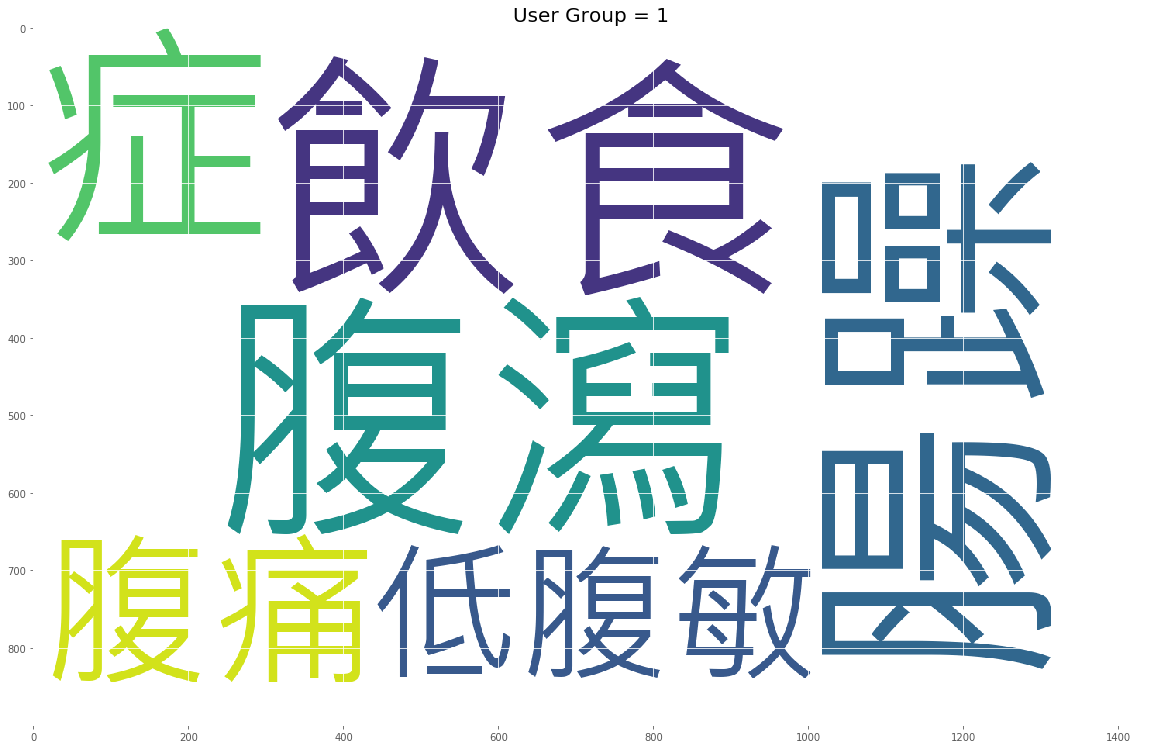

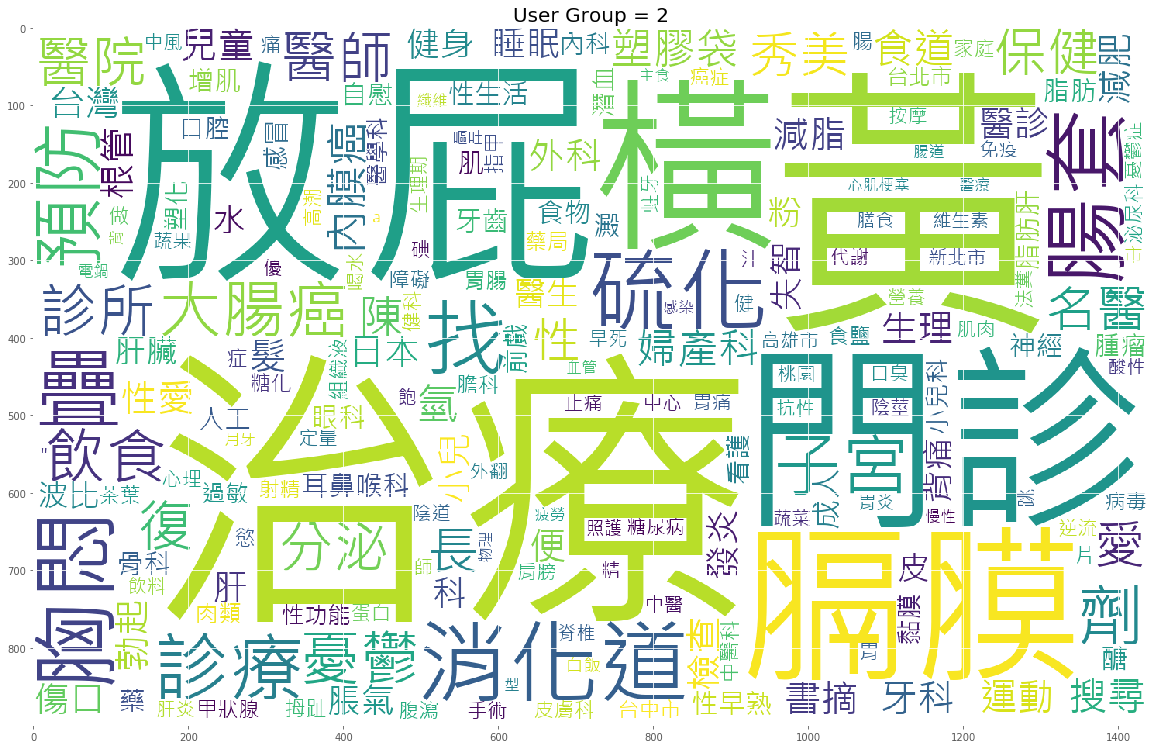

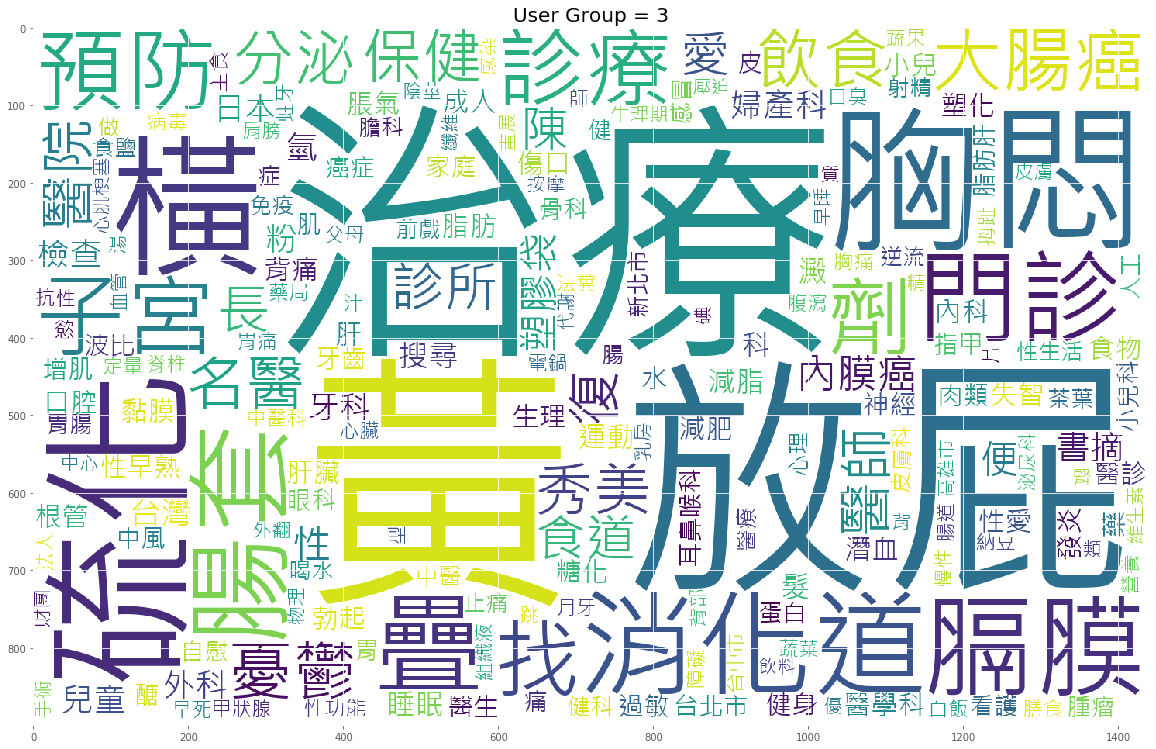

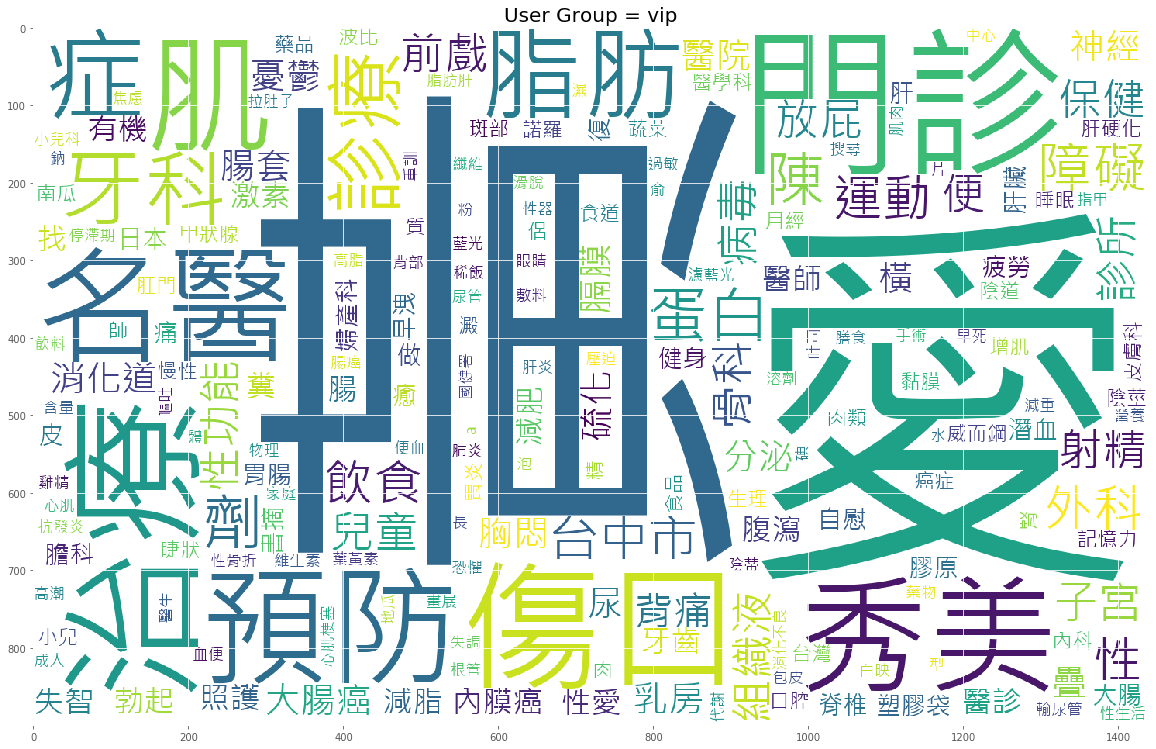

In [79]:
#使用keywords 畫圖
# 0: 主力組 , 1: 潛力組 , 2: 猶豫組 , 3: 路人組  ,'vip' : VIP組
counter = []
for group in [0,1,2,3,'vip']:
    df_counter = ec.draw_group(df_m,stopwords_list,font,group=group,col='keywords_all',relative_scaling=1)
    counter.append(df_counter)

### 8. 用戶偏好購買商品